# Van der Pol Oscillator

## Introduction

The **Van der Pol oscillator** is a non-conservative oscillator with nonlinear damping, originally introduced by Dutch physicist Balthasar van der Pol in 1920 while studying electrical circuits containing vacuum tubes. It has since become one of the most studied dynamical systems in nonlinear dynamics.

## Mathematical Formulation

The Van der Pol oscillator is governed by the second-order differential equation:

$$\frac{d^2x}{dt^2} - \mu(1 - x^2)\frac{dx}{dt} + x = 0$$

where:
- $x$ is the position coordinate
- $\mu$ is the nonlinear damping parameter ($\mu > 0$)
- $t$ is time

### Physical Interpretation

The damping term $-\mu(1 - x^2)\frac{dx}{dt}$ exhibits the following behavior:
- When $|x| < 1$: The coefficient $(1 - x^2) > 0$, resulting in **negative damping** (energy injection)
- When $|x| > 1$: The coefficient $(1 - x^2) < 0$, resulting in **positive damping** (energy dissipation)

This creates a self-sustaining oscillation known as a **limit cycle**.

## State-Space Representation

To solve numerically, we convert to a first-order system. Let $y = \frac{dx}{dt}$:

$$\begin{cases}
\frac{dx}{dt} = y \\
\frac{dy}{dt} = \mu(1 - x^2)y - x
\end{cases}$$

## Liénard Transformation

An alternative representation uses the Liénard transformation with $w = x - \frac{x^3}{3} - \frac{y}{\mu}$:

$$\begin{cases}
\mu\frac{dx}{dt} = x - \frac{x^3}{3} - w \\
\frac{dw}{dt} = \frac{x}{\mu}
\end{cases}$$

This form reveals the relaxation oscillation behavior more clearly for large $\mu$.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Set up plotting style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

## Numerical Implementation

We define the Van der Pol system and solve it using `scipy.integrate.odeint`.

In [2]:
def van_der_pol(state, t, mu):
    """
    Van der Pol oscillator differential equations.
    
    Parameters:
    -----------
    state : array-like
        Current state [x, y] where y = dx/dt
    t : float
        Time (not used explicitly, system is autonomous)
    mu : float
        Nonlinear damping parameter
        
    Returns:
    --------
    array : Derivatives [dx/dt, dy/dt]
    """
    x, y = state
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return [dxdt, dydt]

## Parameter Study

The parameter $\mu$ controls the strength of the nonlinearity:
- $\mu \ll 1$: Nearly harmonic oscillation
- $\mu \approx 1$: Moderate nonlinearity
- $\mu \gg 1$: Relaxation oscillations with sharp transitions

In [3]:
# Define parameters for different regimes
mu_values = [0.1, 1.0, 3.0, 6.0]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Time span for integration
t_max = 50
t = np.linspace(0, t_max, 5000)

# Initial conditions
x0, y0 = 0.5, 0.0
initial_state = [x0, y0]

# Solve for each mu value
solutions = {}
for mu in mu_values:
    solution = odeint(van_der_pol, initial_state, t, args=(mu,))
    solutions[mu] = solution
    
print(f"Integration complete for μ = {mu_values}")
print(f"Initial conditions: x(0) = {x0}, dx/dt(0) = {y0}")

Integration complete for μ = [0.1, 1.0, 3.0, 6.0]
Initial conditions: x(0) = 0.5, dx/dt(0) = 0.0


## Visualization

We create a comprehensive visualization showing:
1. Time series of position $x(t)$ for different $\mu$ values
2. Phase portraits showing the limit cycle behavior
3. Velocity time series $\dot{x}(t)$
4. Energy-like quantity evolution

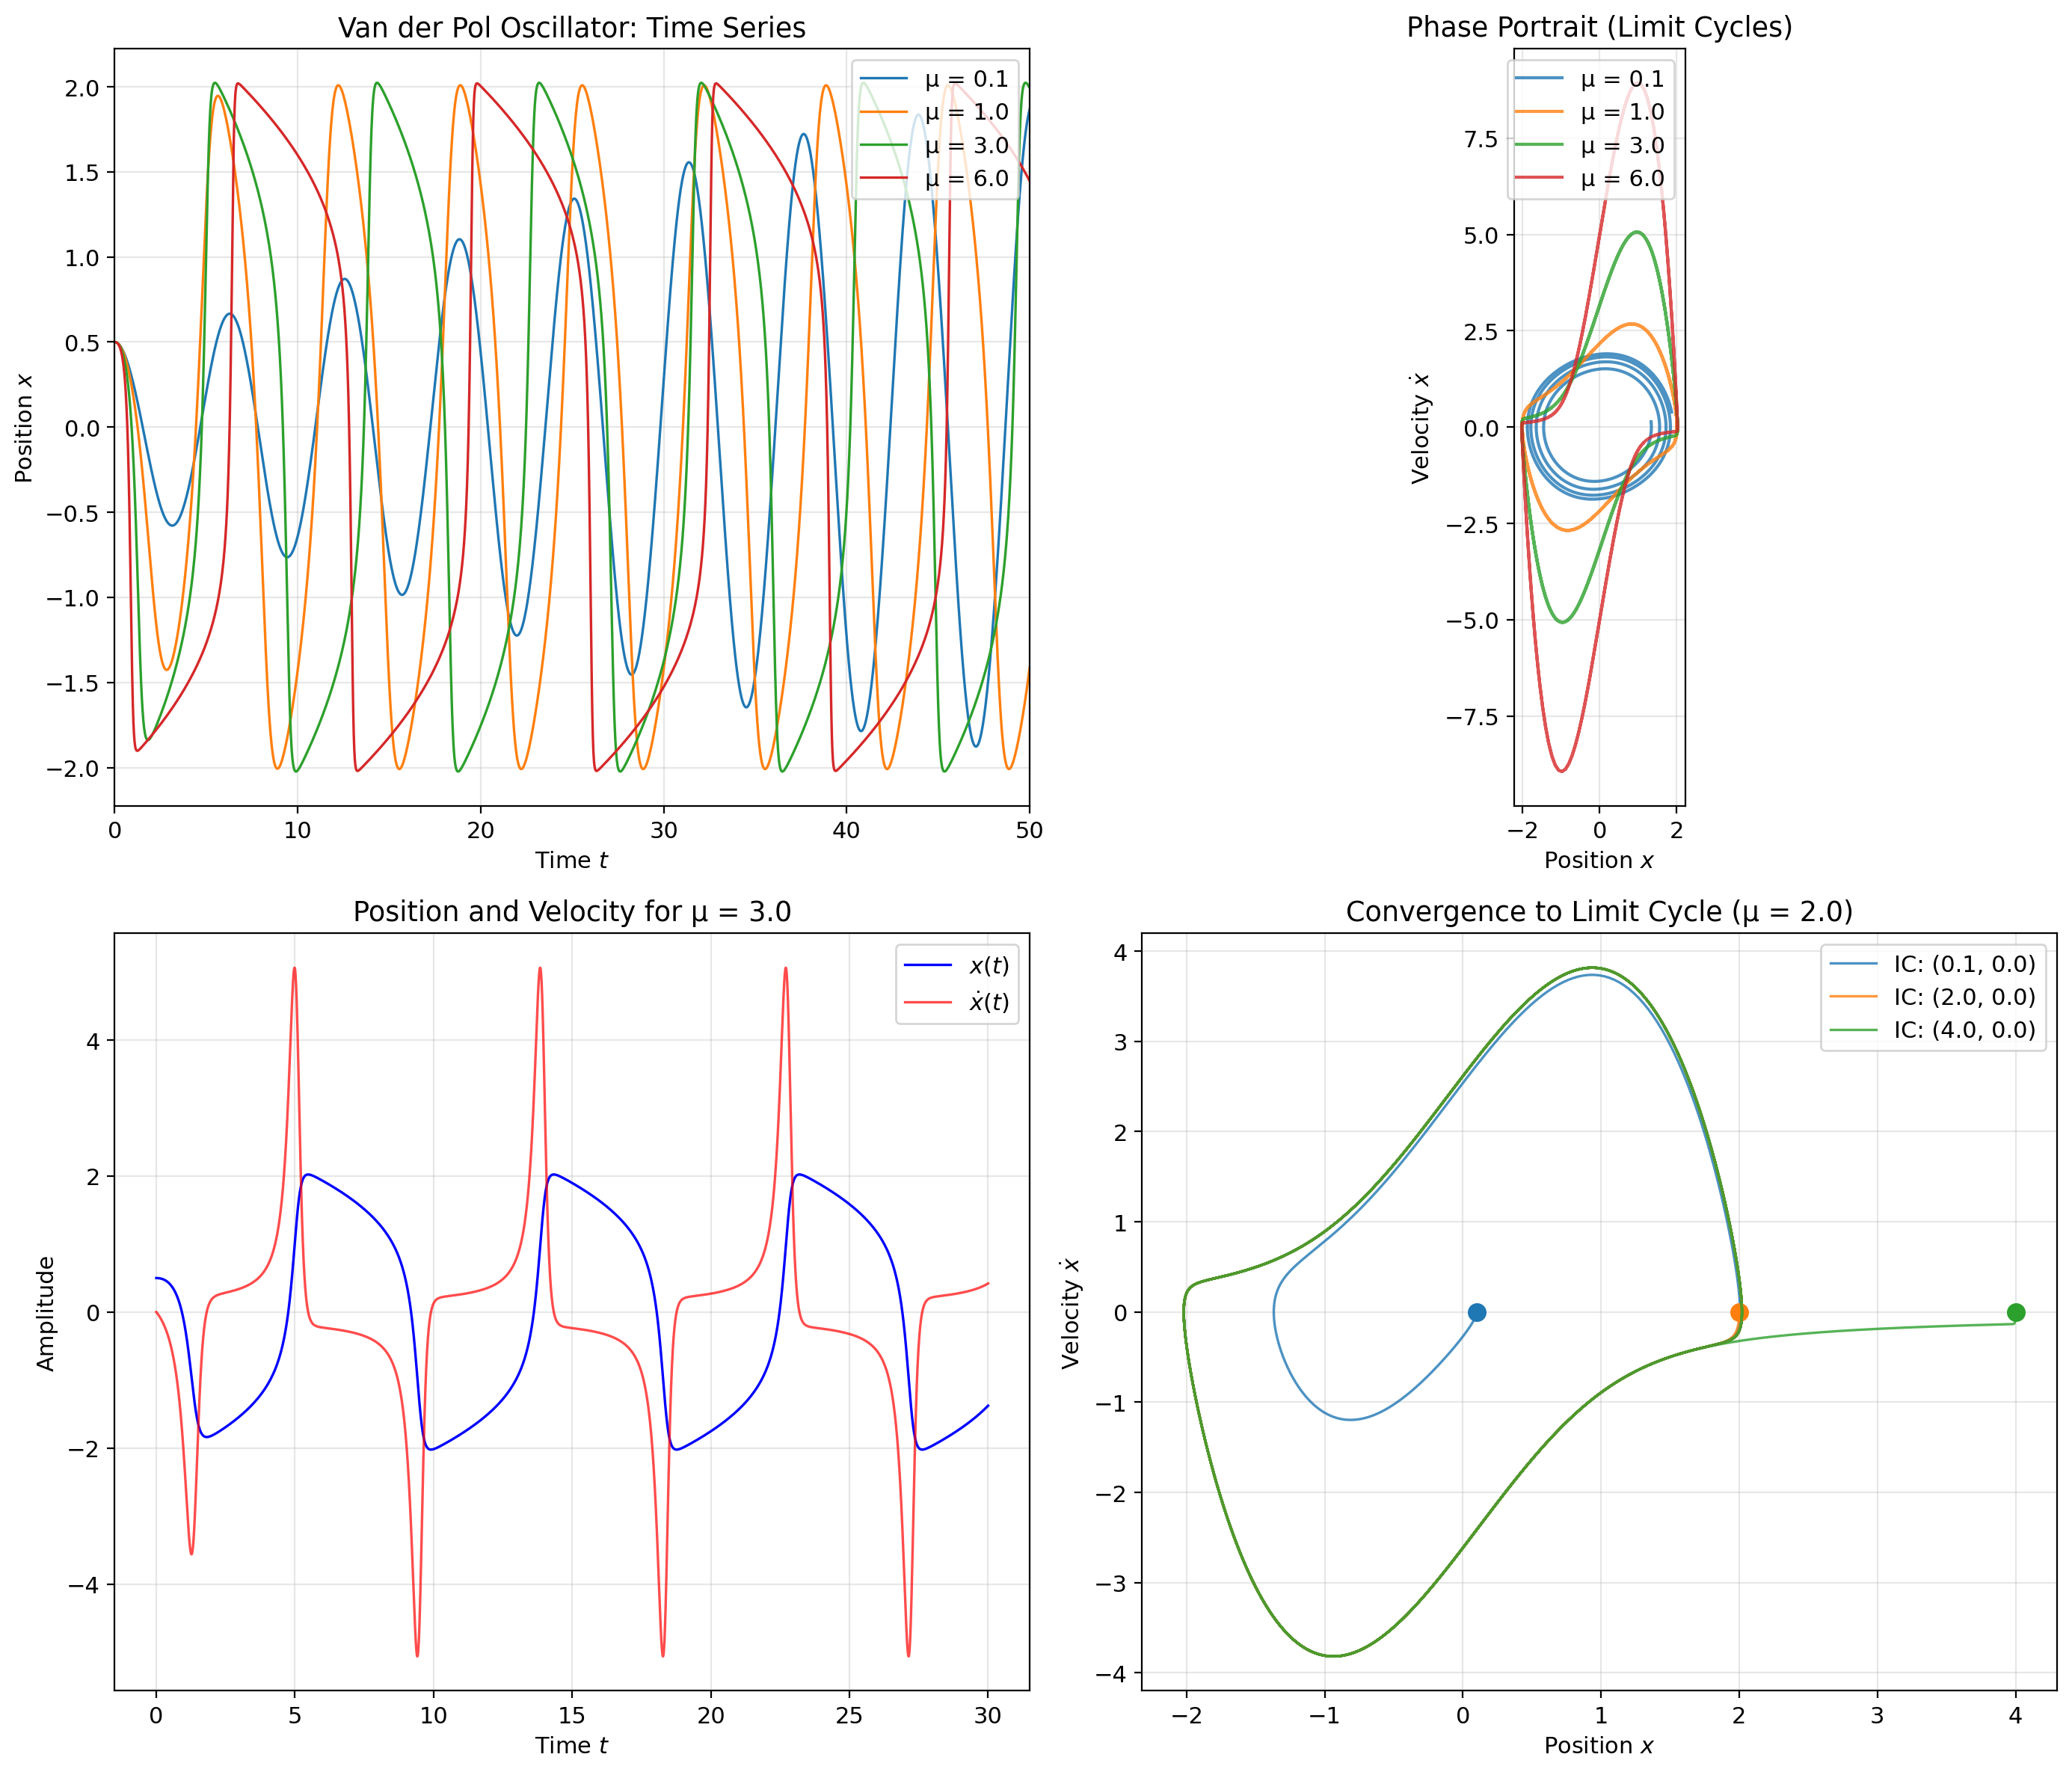


Plot saved to 'plot.png'


In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Time series of x(t)
ax1 = axes[0, 0]
for mu, color in zip(mu_values, colors):
    ax1.plot(t, solutions[mu][:, 0], color=color, label=f'μ = {mu}', linewidth=1.2)
ax1.set_xlabel('Time $t$')
ax1.set_ylabel('Position $x$')
ax1.set_title('Van der Pol Oscillator: Time Series')
ax1.legend(loc='upper right')
ax1.set_xlim(0, t_max)

# Plot 2: Phase portraits
ax2 = axes[0, 1]
for mu, color in zip(mu_values, colors):
    x_sol = solutions[mu][:, 0]
    y_sol = solutions[mu][:, 1]
    # Plot only the last portion to show limit cycle
    start_idx = len(t) // 2
    ax2.plot(x_sol[start_idx:], y_sol[start_idx:], color=color, 
             label=f'μ = {mu}', linewidth=1.5, alpha=0.8)
ax2.set_xlabel('Position $x$')
ax2.set_ylabel('Velocity $\\dot{x}$')
ax2.set_title('Phase Portrait (Limit Cycles)')
ax2.legend(loc='upper right')
ax2.set_aspect('equal', adjustable='box')

# Plot 3: Velocity time series for μ = 3
ax3 = axes[1, 0]
mu_detail = 3.0
t_detail = np.linspace(0, 30, 3000)
sol_detail = odeint(van_der_pol, initial_state, t_detail, args=(mu_detail,))
ax3.plot(t_detail, sol_detail[:, 0], 'b-', label='$x(t)$', linewidth=1.2)
ax3.plot(t_detail, sol_detail[:, 1], 'r-', label='$\\dot{x}(t)$', linewidth=1.2, alpha=0.7)
ax3.set_xlabel('Time $t$')
ax3.set_ylabel('Amplitude')
ax3.set_title(f'Position and Velocity for μ = {mu_detail}')
ax3.legend(loc='upper right')

# Plot 4: Transient behavior with different initial conditions
ax4 = axes[1, 1]
mu_fixed = 2.0
initial_conditions = [
    [0.1, 0.0],
    [2.0, 0.0],
    [4.0, 0.0]
]
ic_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for ic, color in zip(initial_conditions, ic_colors):
    sol_ic = odeint(van_der_pol, ic, t, args=(mu_fixed,))
    ax4.plot(sol_ic[:, 0], sol_ic[:, 1], color=color, 
             label=f'IC: ({ic[0]}, {ic[1]})', linewidth=1.2, alpha=0.8)
    # Mark initial point
    ax4.plot(ic[0], ic[1], 'o', color=color, markersize=8)

ax4.set_xlabel('Position $x$')
ax4.set_ylabel('Velocity $\\dot{x}$')
ax4.set_title(f'Convergence to Limit Cycle (μ = {mu_fixed})')
ax4.legend(loc='upper right')

plt.tight_layout()
plt.savefig('van_der_pol_oscillator_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Analysis of Results

### Key Observations

1. **Limit Cycle Existence**: For all $\mu > 0$, the system converges to a unique stable limit cycle regardless of initial conditions (except the unstable equilibrium at origin).

2. **Amplitude Dependence**: The amplitude of the limit cycle increases with $\mu$. For small $\mu$, the amplitude is approximately 2 (nearly circular limit cycle).

3. **Waveform Shape**: 
   - Small $\mu$: Nearly sinusoidal
   - Large $\mu$: Relaxation oscillations with slow buildup and rapid discharge

4. **Period**: The period $T$ increases with $\mu$. For large $\mu$:
   $$T \approx (3 - 2\ln 2)\mu \approx 1.614\mu$$

### Applications

The Van der Pol oscillator models various phenomena:
- Electrical circuits with tunnel diodes
- Cardiac pacemaker cells
- Neural action potentials
- Acoustic systems
- Economic cycles

In [5]:
# Calculate and display period estimates
print("Period Analysis")
print("=" * 40)

for mu in mu_values:
    # Find period by detecting zero crossings
    x_sol = solutions[mu][:, 0]
    # Use only steady-state portion
    start_idx = len(t) // 2
    x_steady = x_sol[start_idx:]
    t_steady = t[start_idx:]
    
    # Find positive zero crossings
    crossings = []
    for i in range(len(x_steady) - 1):
        if x_steady[i] < 0 and x_steady[i+1] >= 0:
            crossings.append(t_steady[i])
    
    if len(crossings) >= 2:
        periods = np.diff(crossings)
        avg_period = np.mean(periods)
        print(f"μ = {mu}: Period T ≈ {avg_period:.3f}")
    else:
        print(f"μ = {mu}: Insufficient data for period calculation")

Period Analysis
μ = 0.1: Period T ≈ 6.285
μ = 1.0: Period T ≈ 6.661
μ = 3.0: Period T ≈ 8.862
μ = 6.0: Period T ≈ 13.063


## Conclusion

The Van der Pol oscillator demonstrates fundamental concepts in nonlinear dynamics:

- **Self-sustained oscillations** through nonlinear damping
- **Limit cycles** as attractors in phase space
- **Bifurcation** from quasi-harmonic to relaxation oscillations

The interplay between energy injection (for small amplitudes) and energy dissipation (for large amplitudes) creates robust periodic behavior that has made this system a paradigm for understanding oscillatory phenomena across physics, biology, and engineering.